## Importing Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
import seaborn as sns

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading Dataset

In [29]:
dataframe = pd.read_csv('Telco_customer_churn.csv')
df = dataframe.copy()

In [30]:
dataframe.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [32]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## Cleaning Data

### Changing type of total charges column to float

In [33]:
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [34]:
df.drop('churn_reason', inplace=True, axis=1)

In [35]:
df["monthly_charges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: monthly_charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [36]:
df["total_charges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


- Function checking if string represents a numeric value

In [37]:
def represents_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [38]:
def print_non_numeric_strings(series):
    non_numeric_strings = series[~series.apply(represents_numeric)]
    for item in non_numeric_strings:
        print(item + 'non-numeric')

In [39]:
print_non_numeric_strings(df['total_charges'])

 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric


In [40]:
df['total_charges'] = df['total_charges'].apply(lambda x: 0 if x == " " else x )

In [41]:
df['total_charges'] = df['total_charges'].astype('float64')

In [42]:
df["total_charges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


### Removing Uneffective columns

In [43]:
print(
    df['state'].unique(), "\n",
    df['count'].unique(), '\n',
    df['country'].unique()
)

['California'] 
 [1] 
 ['United States']


In [44]:
columnsToDrop = ['count', 'country', 'state', "zip_code"]
df.drop(columns= columnsToDrop, inplace=True, axis=1)

In [45]:
df.head()

,customerid,city,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv
0,3668-QPYBK,Los Angeles,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,Los Angeles,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,Los Angeles,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,Los Angeles,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,Los Angeles,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


## Data Preprocessing

In [46]:
df.head()

,customerid,city,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv
0,3668-QPYBK,Los Angeles,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,Los Angeles,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,Los Angeles,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,Los Angeles,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,Los Angeles,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


### Checking Outliers, and Skewness for the Numeric Values

#### Total Charges

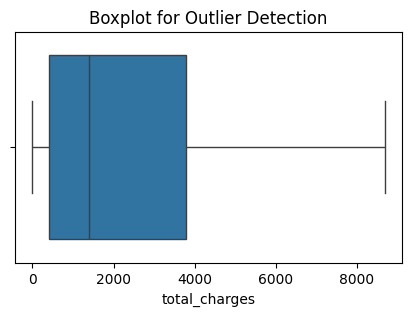

In [47]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['total_charges'])

# Show the plot
plt.xlabel('total_charges')
plt.title('Boxplot for Outlier Detection')
plt.show()

- No outliers detected

<function matplotlib.pyplot.show(close=None, block=None)>

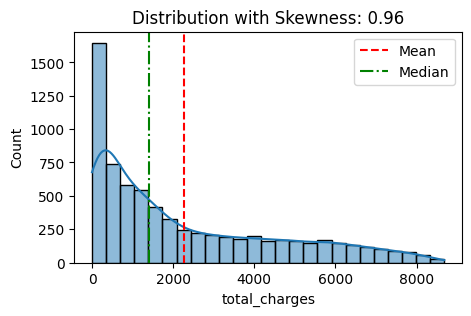

In [48]:
skewness = df['total_charges'].skew()

# Plotting
plt.figure(figsize=(5, 3))
sns.histplot(df['total_charges'], kde=True)
plt.axvline(df['total_charges'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['total_charges'].median(), color='g', linestyle='-.', label='Median')
plt.title(f'Distribution with Skewness: {skewness:.2f}')
plt.legend()
plt.show

- Right skewness detected in total_charges column

#### Monthly Charges

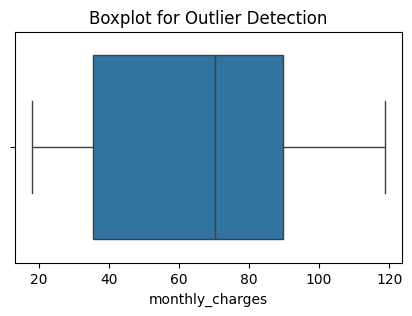

In [49]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['monthly_charges'])

# Show the plot
plt.xlabel('monthly_charges')
plt.title('Boxplot for Outlier Detection')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

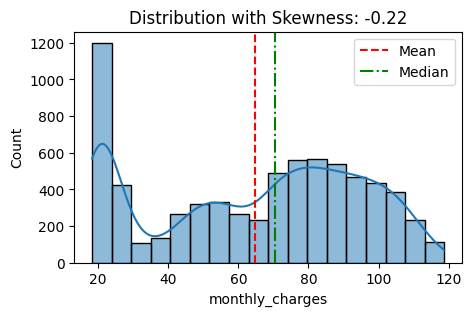

In [50]:
skewness = df['monthly_charges'].skew()

# Plotting
plt.figure(figsize=(5, 3))
sns.histplot(df['monthly_charges'], kde=True)
plt.axvline(df['monthly_charges'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['monthly_charges'].median(), color='g', linestyle='-.', label='Median')
plt.title(f'Distribution with Skewness: {skewness:.2f}')
plt.legend()
plt.show

- left skewness detected

### Preparing the dataset for Regression Models